In [1]:
import os
from keras import layers
from keras import models
from keras import optimizers


# fill this part
from keras.preprocessing.image import ImageDataGenerator



base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.9,
      zoom_range=0.8,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Using TensorFlow backend.


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [ ]:
from matplotlib import pyplot
# prepare iterator
# generate samples and plot
images, labels = train_generator.next()
print(images.shape[0])

for i in range(images.shape[0]):
    print(i)
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # convert to unsigned integers for viewing
    image = images[i].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [2]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 15,239,300
Trainable params: 524,612
Non-trainable params: 14,714,688
_________________________________________________________________


In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=40)


Epoch 1/30
80/80 [==============================] - 120s 1s/step - loss: 1.2277 - acc: 0.4527 - val_loss: 0.4743 - val_acc: 0.8263
Epoch 2/30
80/80 [==============================] - 109s 1s/step - loss: 0.9478 - acc: 0.5599 - val_loss: 0.4120 - val_acc: 0.8943
Epoch 3/30
80/80 [==============================] - 99s 1s/step - loss: 0.8669 - acc: 0.5843 - val_loss: 0.3028 - val_acc: 0.8981
Epoch 4/30
79/80 [============================>.] - ETA: 0s - loss: 0.8752 - acc: 0.6254

KeyboardInterrupt: 

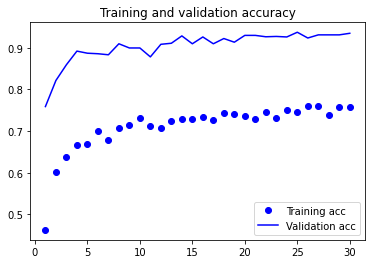

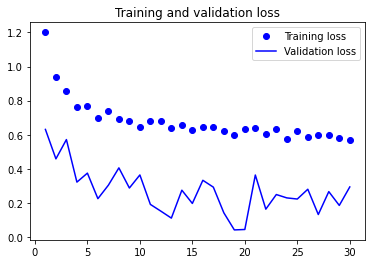

Found 200 images belonging to 4 classes.
test accuracy: 92.50%


In [31]:
model.save('modelQ5.try4') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

import numpy as np
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!



datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='categorical')

loss , acc = model.evaluate_generator(generator=test_generator)
print("test accuracy: {:5.2f}%".format(100*acc))